# Exercise 4.1 - rotation, translation and scale testing with 2D points

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

def get_points(n):
    return np.random.randint(low=-20, high=20, size=n), np.random.randint(low=-20, high=20, size=n)
n = 1000
x,y = get_points(n)

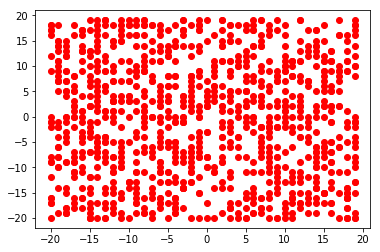

In [108]:
plt.plot(x, y, 'ro')
plt.show()

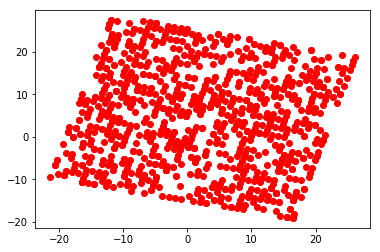

In [109]:
def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy
rotated_x = []
rotated_y = []
for point in zip(x,y):
    new_x, new_y = rotate_origin_only(point, 0.25)
    rotated_x.append(new_x)
    rotated_y.append(new_y)
t_r_x = []
t_r_y = []
for point in zip(rotated_x,rotated_y):
    t_r_x.append(point[0] + 3)
    t_r_y.append(point[1] + 5)
plt.plot(t_r_x, t_r_y, 'ro')
plt.show()

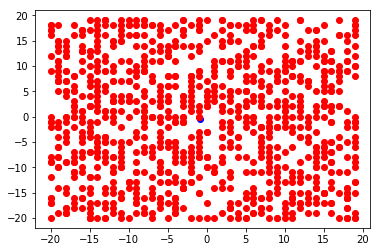

In [110]:
centroid_p = np.array((np.mean(x), np.mean(y)))
centroid_q = np.array((np.mean(t_r_x), np.mean(t_r_y)))
plt.plot(centroid_p[0], centroid_p[1], 'bo')
plt.plot(x, y, 'ro')
plt.show()

In [111]:
p = np.array((x,y))
q = np.array((t_r_x,t_r_y))
print(p)
print(q)
C = (np.matmul(np.subtract(q,centroid_q.reshape(2,1)),np.transpose(np.subtract(p,centroid_p.reshape(2,1)))))
print(C)
u, s, vh = np.linalg.svd(C)
print(u)
print(vh)

[[-15 -20   0 ...   8  12  -4]
 [ -3  17  -8 ...  -2  -4   8]]
[[-12.2758982  -12.17238113   1.02076833 ...  10.25649146  13.63733322
    1.10358199]
 [  5.80432212  26.41959035  -2.75129937 ...   1.08294348  -1.8444972
   13.74091521]]
[[129222.1372654   27718.71604706]
 [-38337.04631138 129473.19189388]]
[[-0.60405425  0.7969432 ]
 [ 0.7969432   0.60405425]]
[[-0.78244257  0.62272275]
 [ 0.62272275  0.78244257]]


In [112]:
R_hat = np.matmul(u, vh)
D = np.array([[1,0],[0,np.linalg.det(R_hat)]])
R = np.matmul(R_hat, D)
print(R)

[[ 0.96891242  0.24740396]
 [-0.24740396  0.96891242]]


In [113]:
t = centroid_q - np.matmul(R, centroid_p)
print(t)

[3. 5.]


# Exercise 4.2 - SIFT feature matching

In [23]:
import numpy as np
import argparse
import imutils
from matplotlib import pyplot as plt
import cv2

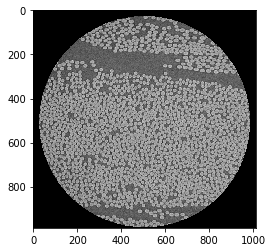

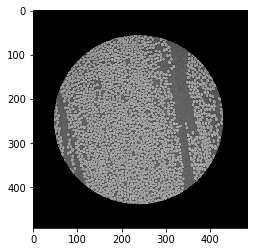

In [132]:
%matplotlib inline
image = cv2.imread('EX_4_data/CT_lab_high_res.png')
plt.imshow(image)
plt.show()
rotated = imutils.rotate_bound(image, 75)
scale_percent = 40 # percent of original size
width = int(rotated.shape[1] * scale_percent / 100)
height = int(rotated.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
rotated_resized = cv2.resize(rotated, dim, interpolation = cv2.INTER_AREA)
plt.imshow(rotated_resized)
plt.show()

In [133]:
print(cv2.__version__)
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image,None)
print(des1.shape)
kp2, des2 = sift.detectAndCompute(rotated_resized,None)
print(des2.shape)

3.3.0
(19098, 128)
(4304, 128)


In [134]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1,des2,k=2)

150.92713928222656
202.054443359375


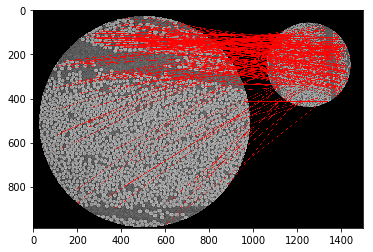

In [138]:
good = []

print(matches[0][1].distance)
for m,n in matches:
    if  m.distance < 0.6*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
print(good[0][0].distance)
#good = sorted(student_tuples, key=lambda student: student[2])
img3 = cv2.drawMatchesKnn(image,kp1,rotated_resized,kp2,good[0:250],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=[255,0,0])
plt.imshow(img3)
plt.show()

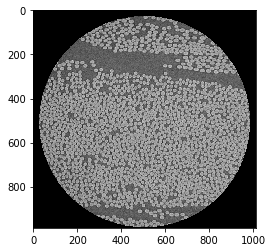

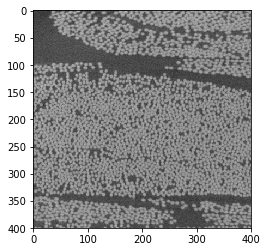

In [26]:
%matplotlib inline
image_high_res = cv2.imread('EX_4_data/CT_lab_high_res.png')
plt.imshow(image_high_res)
plt.show()
image_low_res = cv2.imread('EX_4_data/CT_lab_low_res.png')
plt.imshow(image_low_res)
plt.show()

(19098, 128)
(6367, 128)
262.15643310546875
176.28102111816406


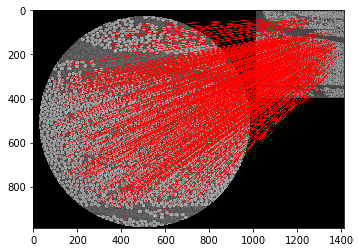

In [64]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image_high_res,None)
print(des1.shape)
kp2, des2 = sift.detectAndCompute(image_low_res,None)
print(des2.shape)
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1,des2,k=2)
good = []

print(matches[0][1].distance)
for m,n in matches:
    if  m.distance < 0.6*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
print(good[0][0].distance)
#good = sorted(student_tuples, key=lambda student: student[2])
img3 = cv2.drawMatchesKnn(image_high_res,kp1,image_low_res,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=[255,0,0])
plt.imshow(img3)
plt.show()

# Exercise 4.3 - Transforming matched features

In [45]:
#First we compute the descriptors and keypoints and find matches
kp1, des1 = sift.detectAndCompute(image_high_res,None)
kp2, des2 = sift.detectAndCompute(image_low_res,None)
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if  m.distance < 0.6*n.distance:
        good.append([m])


176.28102111816406
151.83543395996094
137.78607177734375
168.42506408691406
125.29964447021484
124.13299560546875
138.70111083984375
118.32159423828125
175.0
163.71011352539062
134.35400390625
144.86199951171875
117.36268615722656
133.20285034179688
126.77144622802734
113.9078598022461
104.990478515625
130.42239379882812
100.74224853515625
163.8322296142578
149.30841064453125
178.19371032714844
138.2931671142578
162.8342742919922
131.96591186523438
118.86967468261719
134.666259765625
186.03225708007812
122.07374572753906
188.9126739501953
155.08384704589844
171.3009033203125
153.52198791503906
121.93850708007812
164.3684844970703
153.00979614257812
161.7838134765625
157.71810913085938
179.4937286376953
141.42489624023438
148.31385803222656
131.98863220214844
139.94284057617188
119.15116119384766
123.09346008300781
72.91776275634766
158.21820068359375
100.05498504638672
147.8817138671875
162.2528839111328
123.80226135253906
133.5327606201172
167.5619354248047
152.633544921875
144.506057

In [49]:
#Filter out matches that have too large distance between them
print(len(good))
result = list(filter(lambda x: (x[0].distance < 170), good)) 
print(len(result))

638
608


In [123]:
#Get keypoints of matches
p = []
q = []
    
for m in result:
    p.append(kp1[m[0].queryIdx].pt)
    q.append(kp2[m[0].trainIdx].pt)
    

In [139]:
centroid_p = np.mean(p, axis=0)
centroid_q = np.mean(q, axis=0)
avg_d_q = np.subtract(q,centroid_q)
dist_q = 0
for p_1 in avg_d_q:
    dist_q += math.sqrt(p_1[0]**2 + p_1[1]**2)
avg_d_p = np.subtract(p,centroid_p)
dist_p = 0
for p_1 in avg_d_p:
    dist_p += math.sqrt(p_1[0]**2 + p_1[1]**2)
s=dist_q/dist_p
print(s)

C = (np.matmul(np.transpose(avg_d_q), avg_d_p))

u, s, vh = np.linalg.svd(C)
R_hat = np.matmul(u, vh)
D = np.array([[1,0],[0,np.linalg.det(R_hat)]])
R = np.matmul(R_hat, D)
print(R)
s=dist_q/dist_p
t = centroid_q - np.matmul(R, centroid_p)*s
print(t)

0.36844024857785623
[[ 0.99999874 -0.00158805]
 [ 0.00158805  0.99999874]]
[20.02576083 12.31684343]


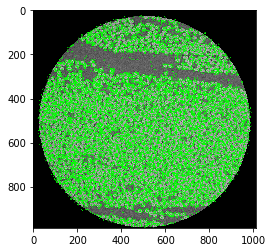

In [68]:
img2 = cv2.drawKeypoints(image_high_res,kp1,None,color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()